Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и палучить с помощью модели прогнозы результативного прознака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [80]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

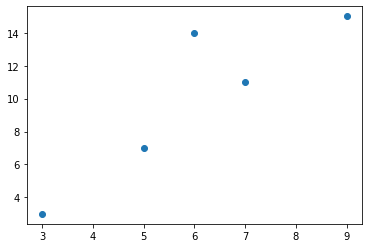

In [99]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [104]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [107]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


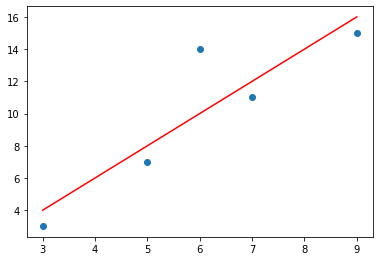

In [113]:
#Изобразим на графике исходные данные и прогнозы 
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [115]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.1
        dT_a0 = -2*sum((Y -self.predict(x)))
        dT_a1 = -2*sum((Y -self.predict(x))*x)
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

In [118]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


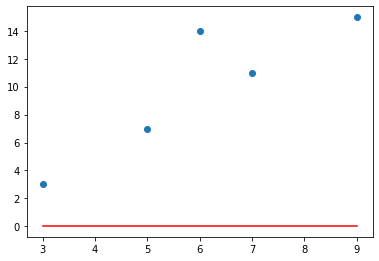

In [119]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  183892.0


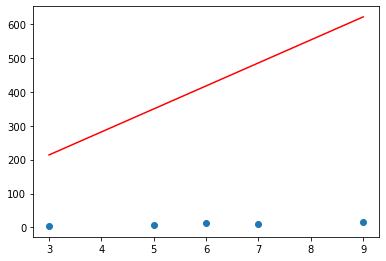

In [120]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [131]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [132]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)

5.004697916218
8.190462542210001
11.376227168202002
9.783344855206002
14.561991794194002
MSE после градиентного спуска:  4.709918696051655


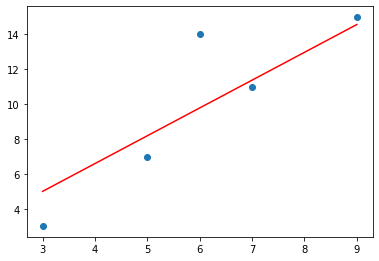

In [133]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

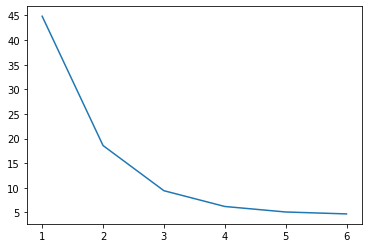

In [134]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [153]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  [44.842000000000006, 18.592056039999992, 9.423492943972002, 6.220687550709632, 5.101453686846005, 4.709918696051655, 4.572537368426523, 4.523921703173944, 4.506309123493107, 4.49952576233604, 4.496525794791649, 4.494848429369669, 4.4936342201035115, 4.492582998847469, 4.491589927995798, 4.490618390101201, 4.489655593947607, 4.4886970697523125, 4.487741254038889, 4.486787598377363, 4.4858359088523745, 4.484886115369198, 4.483938191082683, 4.482992124257447, 4.482047908439876, 4.48110553902564, 4.480165012060874, 4.4792263238234815, 4.478289470676894, 4.477354449018968, 4.476421255264154, 4.475489885837243, 4.474560337171181, 4.47363260570629, 4.472706687889998, 4.471782580176725, 4.470860279027837, 4.469939780911632, 4.469021082303307, 4.46810417968495, 4.4671890695455305, 4.466275748380885, 4.465364212693688, 4.464454458993465, 4.463546483796557, 4.462640283626119, 4.461735855012098, 4.460833194491231, 4.459932298607023, 4.459033163909733, 4.458135786956

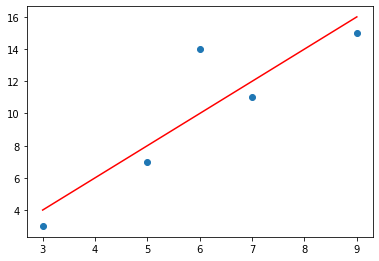

In [154]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", errors)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

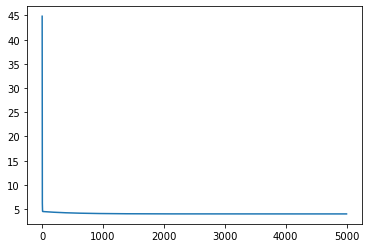

In [137]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  [110.74521999999999, 102.23203075920401, 94.40100755775765, 87.1974874630561, 80.57118776096482, 74.47585496268871, 68.86894193722001, 63.71131091562155, 58.96696029399908, 54.60277332813962, 50.588286965605576, 46.89547920164155, 43.49857347455471, 40.37385873517121, 37.499523934382694, 34.855505773441045, 32.42334865423827, 30.18607585196951, 28.128071010913725, 26.234969136125688, 24.493556320118824, 22.89167750459128, 21.41815163333607, 20.062693604069057, 18.81584247436789, 17.66889542057106, 16.613846988644266, 15.643333212961114, 14.750580212925438, 13.929356908619217, 13.173931525412893, 12.479031583923042, 11.839807096031604, 11.251796710060372, 10.710896568780809, 10.213331662875738, 9.755629479888892, 9.33459576472161, 8.947292222475266, 8.59101600799677, 8.263280858955813, 7.961799740755543, 7.6844688821311085, 7.429353089998473, 7.194672241045204, 6.978788855769309, 6.780196668227992, 6.597510111708699, 6.429454646928266, 6.274857865247215, 

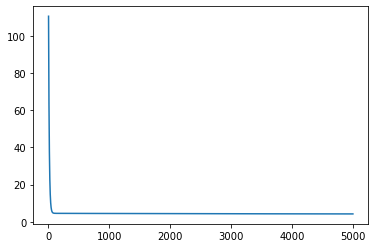

In [161]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.01, 0.1, 1, 10, ...
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", errors)
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)